In [ ]:
!pip install py7zr
from pandas import DataFrame, read_csv, get_dummies, Series, concat
from pathlib import Path
from numpy import array, random, eye, argmax, set_printoptions, inf, zeros, ndarray
import numpy
import pickle
import py7zr
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard, Callback, ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.layers.core import Dropout
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from os.path import split
from random import shuffle
from shutil import rmtree
import random
import glob
from re import findall
from csv import writer
from cv2 import VideoCapture, waitKey, imshow, cvtColor, flip, COLOR_BGR2RGB, COLOR_RGB2BGR, putText, FONT_HERSHEY_SIMPLEX, resize, rectangle, line, VideoWriter_fourcc, VideoWriter
from tqdm import tqdm

     |████████████████████████████████| 4.3 MB 29.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 131 kB 61.9 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 357 kB 66.9 MB/s 
     |████████████████████████████████| 2.4 MB 56.9 MB/s 
     |████████████████████████████████| 2.0 MB 69.5 MB/s 
     |████████████████████████████████| 57 kB 6.2 MB/s 
  Created wheel for py7zr: filename=py7zr-0.18.5-py3-none-any.whl size=69901 sha256=be7aa84925d7e411ec18f00b4a6939a74c53b1149e9c0390601dea73f464878a
  Stored in directory: /root/.cache/pip/wheels/c8/f6/f8/9a860b95b853b2a891d478d2d2afde2fc0460514a7015d15d5
Successfully built py7zr


In [ ]:
class Writer:
    temp_path = ''
    def write_to_csv(self, result: ndarray, out_csv: str):
        out_csv = Path(out_csv)
        with out_csv.open('a+') as csv:
            csv_writer = writer(csv)
            csv_writer.writerow(result)
    def write_as_video(self, path, image):
        if self.temp_path != path: 
            self.temp_path = path
            self.writer = VideoWriter(path, VideoWriter_fourcc('M','J','P','G'), 10, (640, 480))
        self.writer.write(image)  
w = Writer()
all_source_ds=[]
pbar = tqdm(total=300, bar_format ='{l_bar}{bar}|  {n_fmt}/{total_fmt}  [ Elapsed Time : {elapsed} | ETA : {remaining} ]', leave=True, position=0)

  0%|          |  0/300  [ Elapsed Time : 11:48 | ETA : ? ]


In [ ]:
make_dir = Path('/content/Onionskin')
path_to_source_folder = Path('/content/drive/MyDrive/handmask/Age,Bird,Favourite_handmask.zip')
if make_dir.exists(): rmtree(make_dir)
make_dir.mkdir()

if findall('.7z', str(path_to_source_folder)):
    with py7zr.SevenZipFile(path_to_source_folder, mode='r') as z:
        z.extractall(make_dir)
elif findall('.zip', str(path_to_source_folder)):
    !unzip $path_to_source_folder -d $make_dir
else:
    path_to_source_folder = Path(path_to_source_folder)

In [ ]:
path_to_source_folder = Path('/content/Onionskin/content/ASLdataset/content')
source_directory = path_to_source_folder

In [ ]:
classes = sorted(list(x.name for x in source_directory.glob('*')))
if any('.ipynb_checkpoints' in s for s in classes):
    classes.remove('.ipynb_checkpoints')
print(classes)
for category in classes:
    cat_dir = list((source_directory/category).glob("*"))
    all_source_ds.append(cat_dir)

['Age', 'Bird', 'Favourite']


In [ ]:
all_source_ds[2][99]

PosixPath('/content/ASLdataset/content/ASLdataset/content/Favourite/Favourite_77.csv')

In [ ]:

current_ds = all_source_ds[0]
file_name = current_ds[0]
print(file_name)

/content/ASLdataset/content/ASLdataset/content/Age/Age_83.csv


In [ ]:
label = split(split(file_name)[0])[1]
print(label)

Age


In [ ]:
for z in range(len(all_source_ds)):
    current_ds = all_source_ds[z]

    for file_name in current_ds:
        label = split(split(file_name)[0])[1]
        mk_dir = Path('/content/newfiles/'+label)
        if not mk_dir.exists(): mk_dir.mkdir()
        d = read_csv(str(file_name), header=None ).values
        x_valid =[]
        if d.shape == (50,480):
            set_printoptions(threshold=inf)
            x_valid.append(d)
        for i in range(len(x_valid)):
            video = x_valid[i]                       #taking in the video frames

            #converting string into int
            whole_video_pixels = []
            for image in video:
                whole_image_pixels = []
                for image_rows in range(len(image)):   
                    pix_row = image[image_rows]                  #row_of_pixels
                    k = 0
                    temp = []
                    while k<len(pix_row):
                        if k%73==0:
                            k+=1
                        temp.append(int(pix_row[k]))
                        k+=3
                    whole_image_pixels.append(temp)
                whole_video_pixels.append(whole_image_pixels)
            video = whole_video_pixels


            first_frame=video[0]
            for frames in range(1,len(video)):
                image = video[frames]                 #taking frame of the video
                for row in range(len(image)):
                    for column in range(len(image[0])):
                        first_frame[row][column]+=image[row][column]
            for row in range(len(first_frame)):
                for column in range(len(first_frame[row])):
                    first_frame[row][column] =first_frame[row][column]/50
            newfilename = split(split(file_name)[1])[1]
            for row in range(len(first_frame)):
                    w.write_to_csv(first_frame[row], '/content/newfiles/'+label+'/'+newfilename) 

            pbar.update(1)






            # for img_row in range(len(image)):
            #     image_pixel_row = image[img_row]    #taking row of pixels of a image
            #     if 1 in image_pixel_row:        #checking if pixel row has any 1's i.e part of hand
            #         for index,val in enumerate(image_pixel_row):     #finding the index of the 1's found
            #             if val==1:
            #                 onion_video[img_row][index]+=0.01
            #             else:
            #                 onion_video[img_row][index]-=0.01
            #     else:


100%|██████████|  300/300  [ Elapsed Time : 1:11:29 | ETA : 00:00 ]

In [ ]:
print(first_frame[440])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 3, 4, 4, 4, 4, 5, 5, 8, 9, 11, 16, 19, 21, 26, 26, 29, 29, 30, 34, 38, 44, 46, 46, 46, 46, 45, 45, 45, 45, 45, 46, 46, 46, 46, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 48, 48, 46, 46, 45, 44, 41, 35, 31, 29, 29, 21, 20, 17, 16, 13, 11, 8, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
    for row in range(len(first_frame)):
        for column in range(len(first_frame[row])):
            first_frame[row][column] =first_frame[row][column]/50

In [ ]:
print(first_frame[440])


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.02, 0.02, 0.06, 0.06, 0.08, 0.08, 0.08, 0.08, 0.1, 0.1, 0.16, 0.18, 0.22, 0.32, 0.38, 0.42, 0.52, 0.52, 0.58, 0.58, 0.6, 0.68, 0.76, 0.88, 0.92, 0.92, 0.92, 0.92, 0.9, 0.9, 0.9, 0.9, 0.9, 0.92, 0.92, 0.92, 0.92, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.9

In [ ]:
trial=[[0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5]]
row = 5
trail = [float(elem-0.01) for elem in trial[row]]


In [ ]:
print(trial)

[[0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5], [0.5, 0.5]]


In [ ]:
!zip -r /content/onionfixed.zip /content/newfiles

In [ ]:
!cp /content/onionfixed.zip /content/drive/MyDrive/handmask

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
min_val, max_val = 0, 1
intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))
cm = sns.light_palette("blue", as_cmap=True)
x=pd.DataFrame(first_frame)
x=x.style.background_gradient(cmap=cm)
display(x)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pylab
rows = 480
columns = 640
fig = pylab.figure(figsize=(columns*0.01,rows*0.01))
pylab.figimage(first_frame,cmap=cm.jet,origin='lower')
fig.savefig("image.png")

AttributeError: ignored

<Figure size 460.8x345.6 with 0 Axes>

In [ ]:
print(len(first_frame[0]))


640


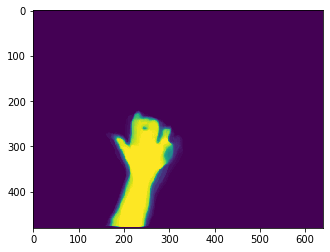

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(first_frame, interpolation='nearest')
plt.show()

In [ ]:
import csv
data = read_csv(str('/content/newfiles/Age/Age_0.csv'), header=None,quoting=csv.QUOTE_NONNUMERIC,delimiter = ',' ).values

In [ ]:
print(data[0][0].type)

AttributeError: ignored

TypeError: ignored

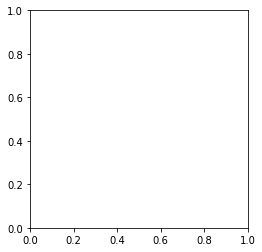

In [ ]:

from matplotlib import pyplot as plt
whole_video_pixels = []
# for image in data:
#     whole_image_pixels = []
#     for image_rows in range(len(image)):   
#         pix_row = image[image_rows]                  #row_of_pixels
#         k = 0
#         temp = []
#         while k<len(pix_row):
#             if k%73==0:
#                 k+=1
#             print(pix_row[k])
#             temp.append(int(pix_row[k]))
#             k+=5
#         whole_image_pixels.append(temp)
#     whole_video_pixels.append(whole_image_pixels)
# video = whole_video_pixels
plt.imshow(data, interpolation='nearest')
plt.show()